In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams


## Read Dataset

In [2]:
df=pd.read_csv("indian_liver_patient.csv")
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.shape

(583, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
df.Gender.value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [6]:
df['Gender']=df['Gender'].apply(lambda x:1 if x=='Male' else 0)
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


<AxesSubplot:>

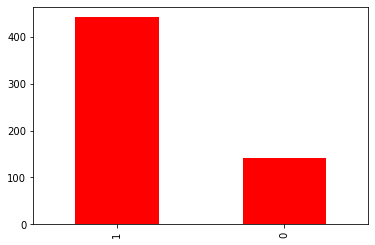

In [7]:
df['Gender'].value_counts().plot.bar(color='red')

<AxesSubplot:>

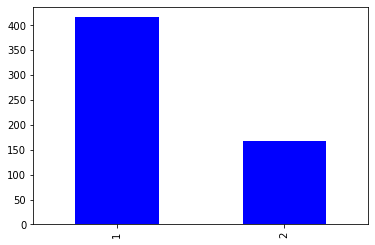

In [8]:
df['Dataset'].value_counts().plot.bar(color='blue')

In [ ]:
C

## Check Null Values

In [9]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [10]:
df['Albumin_and_Globulin_Ratio'].mean()

0.9470639032815201

In [11]:
df=df.fillna(0.94)

In [12]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

## Data Visualization

<AxesSubplot:>

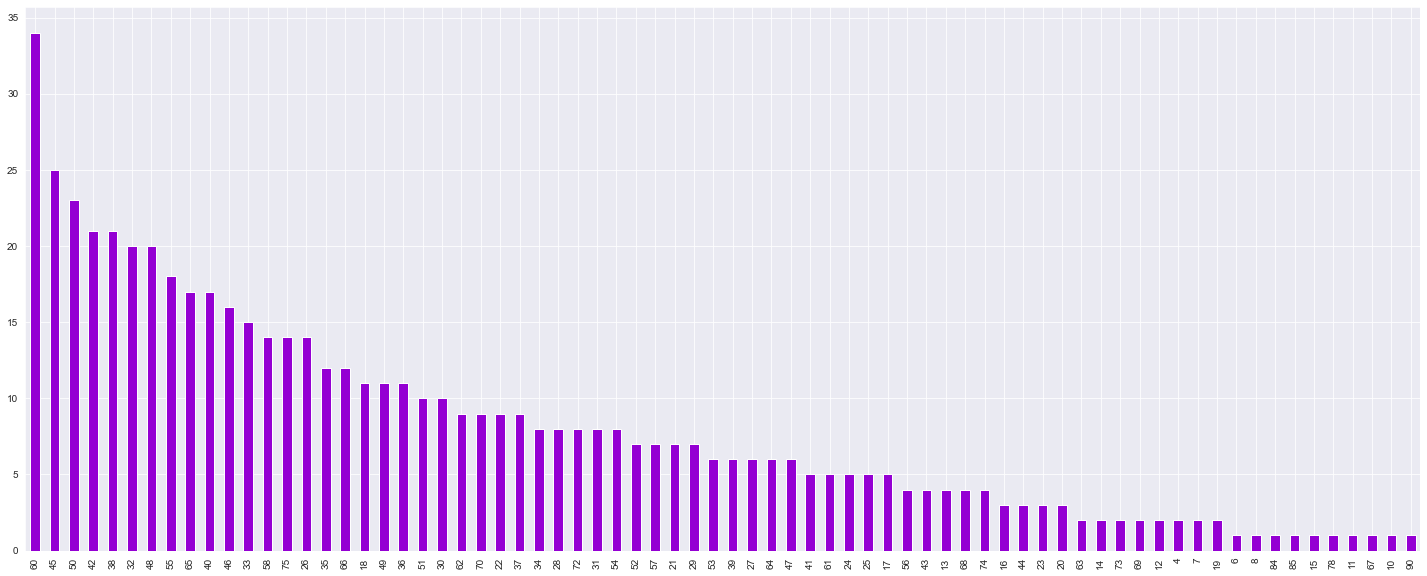

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize=(25,10))
df['Age'].value_counts().plot.bar(color='darkviolet')

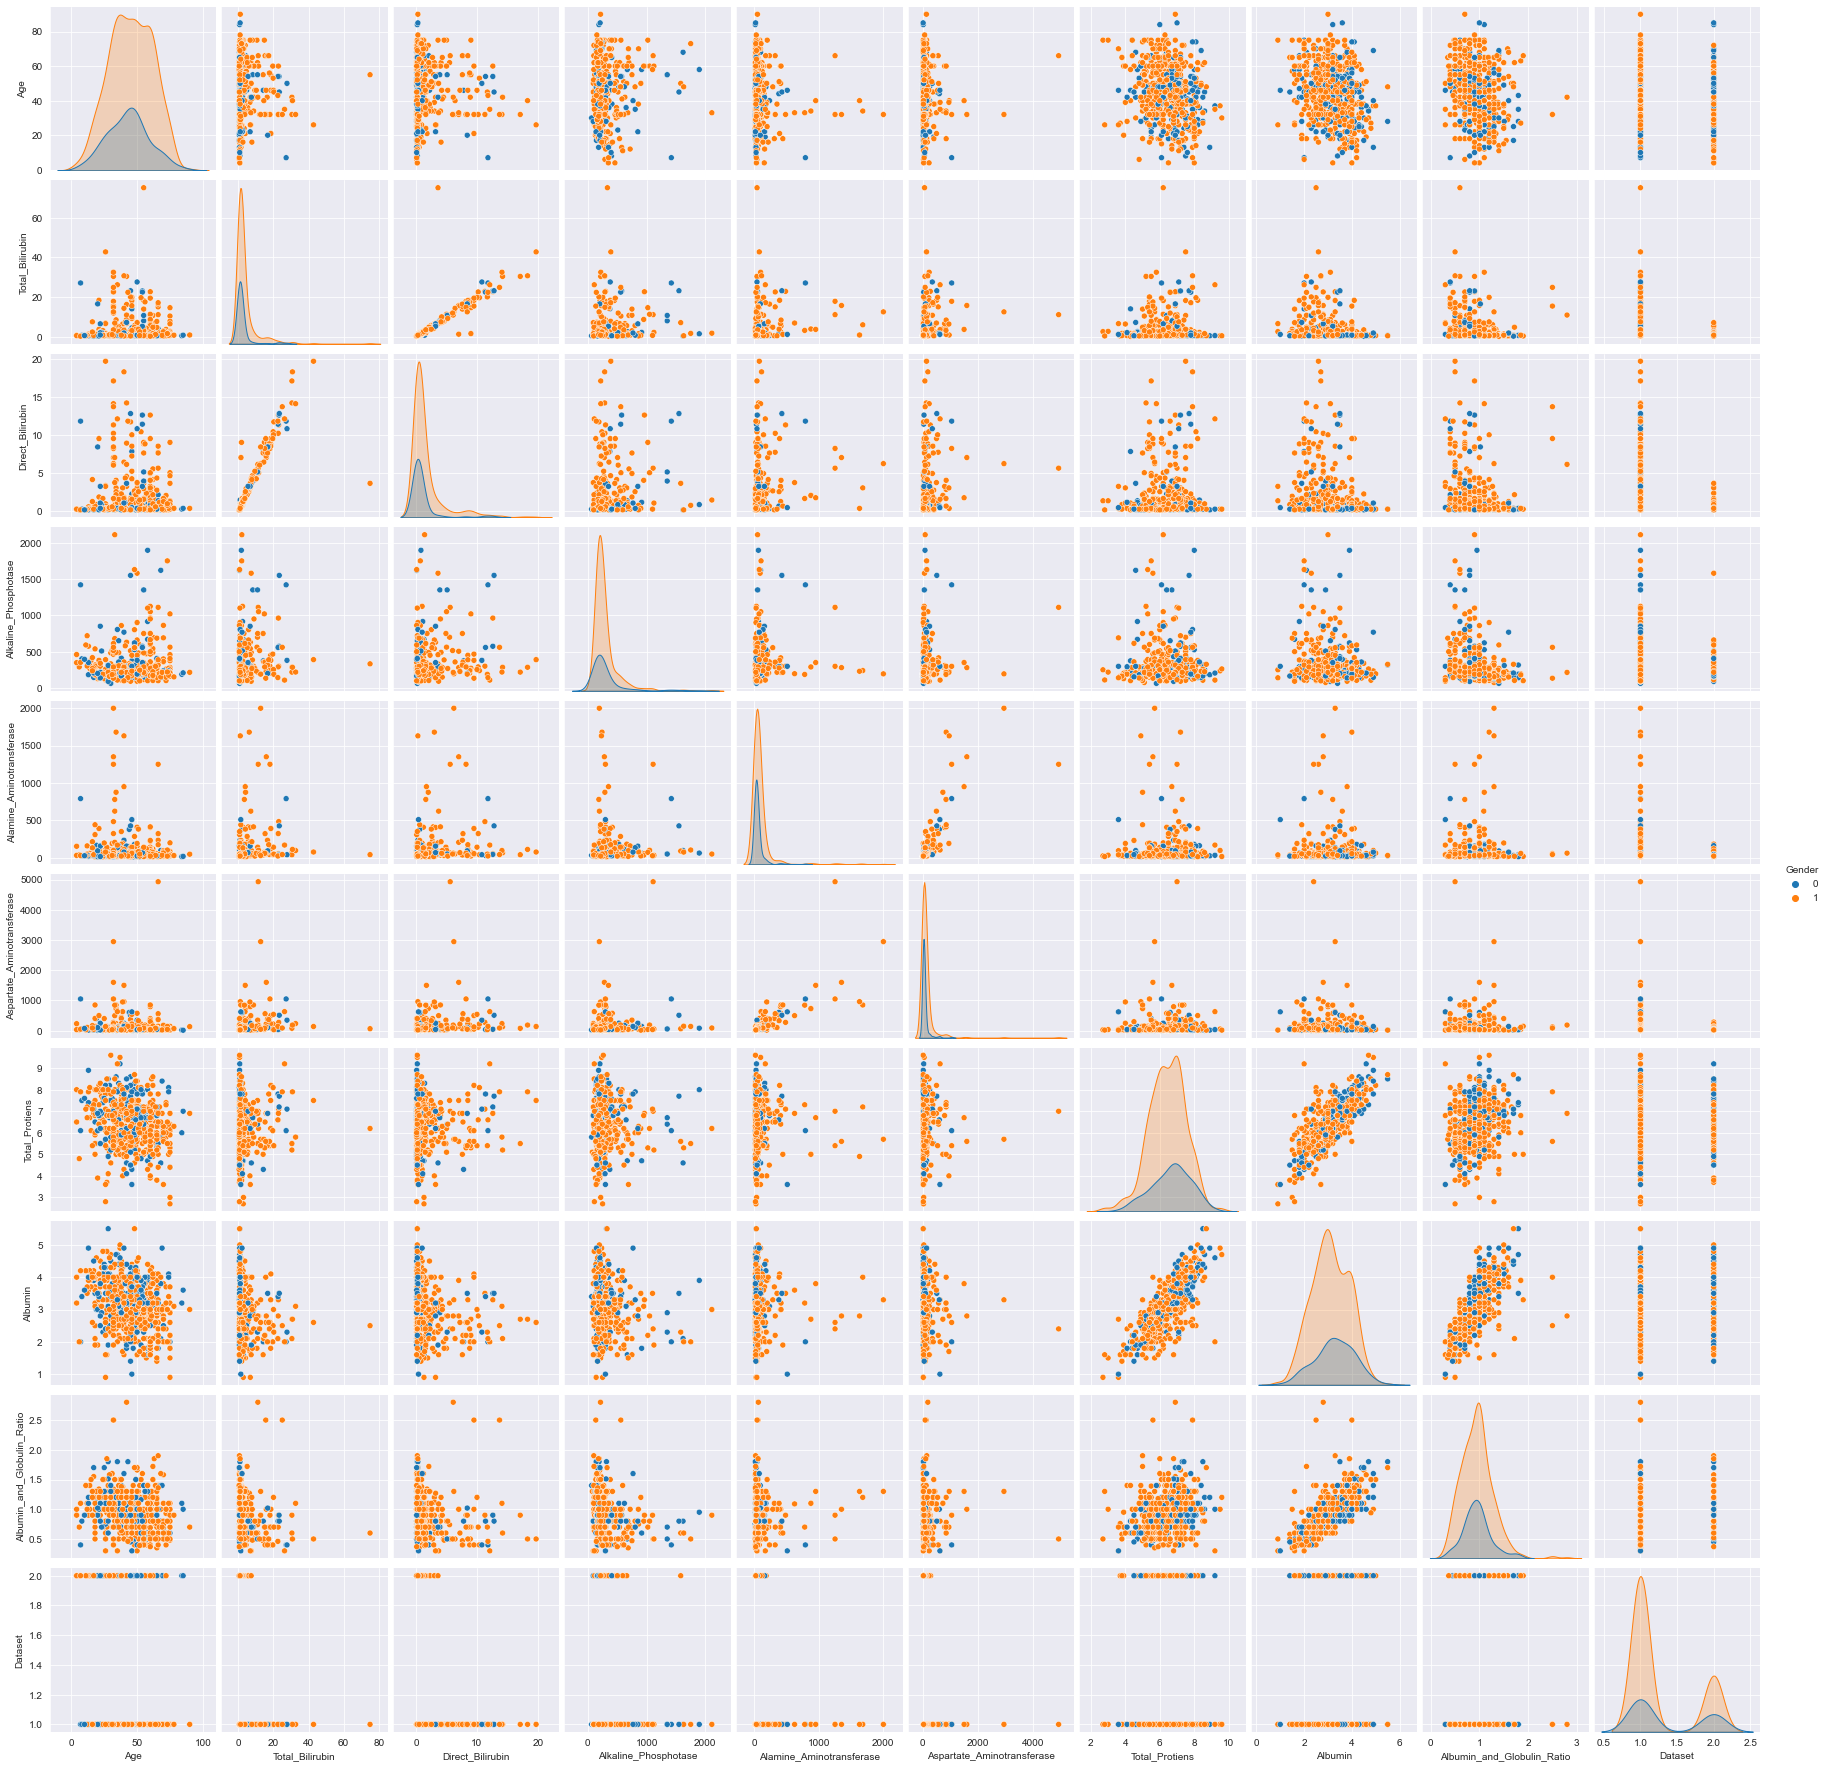

In [14]:
plt.rcParams['figure.figsize']=(10,10)
sns.pairplot(df,hue='Gender')

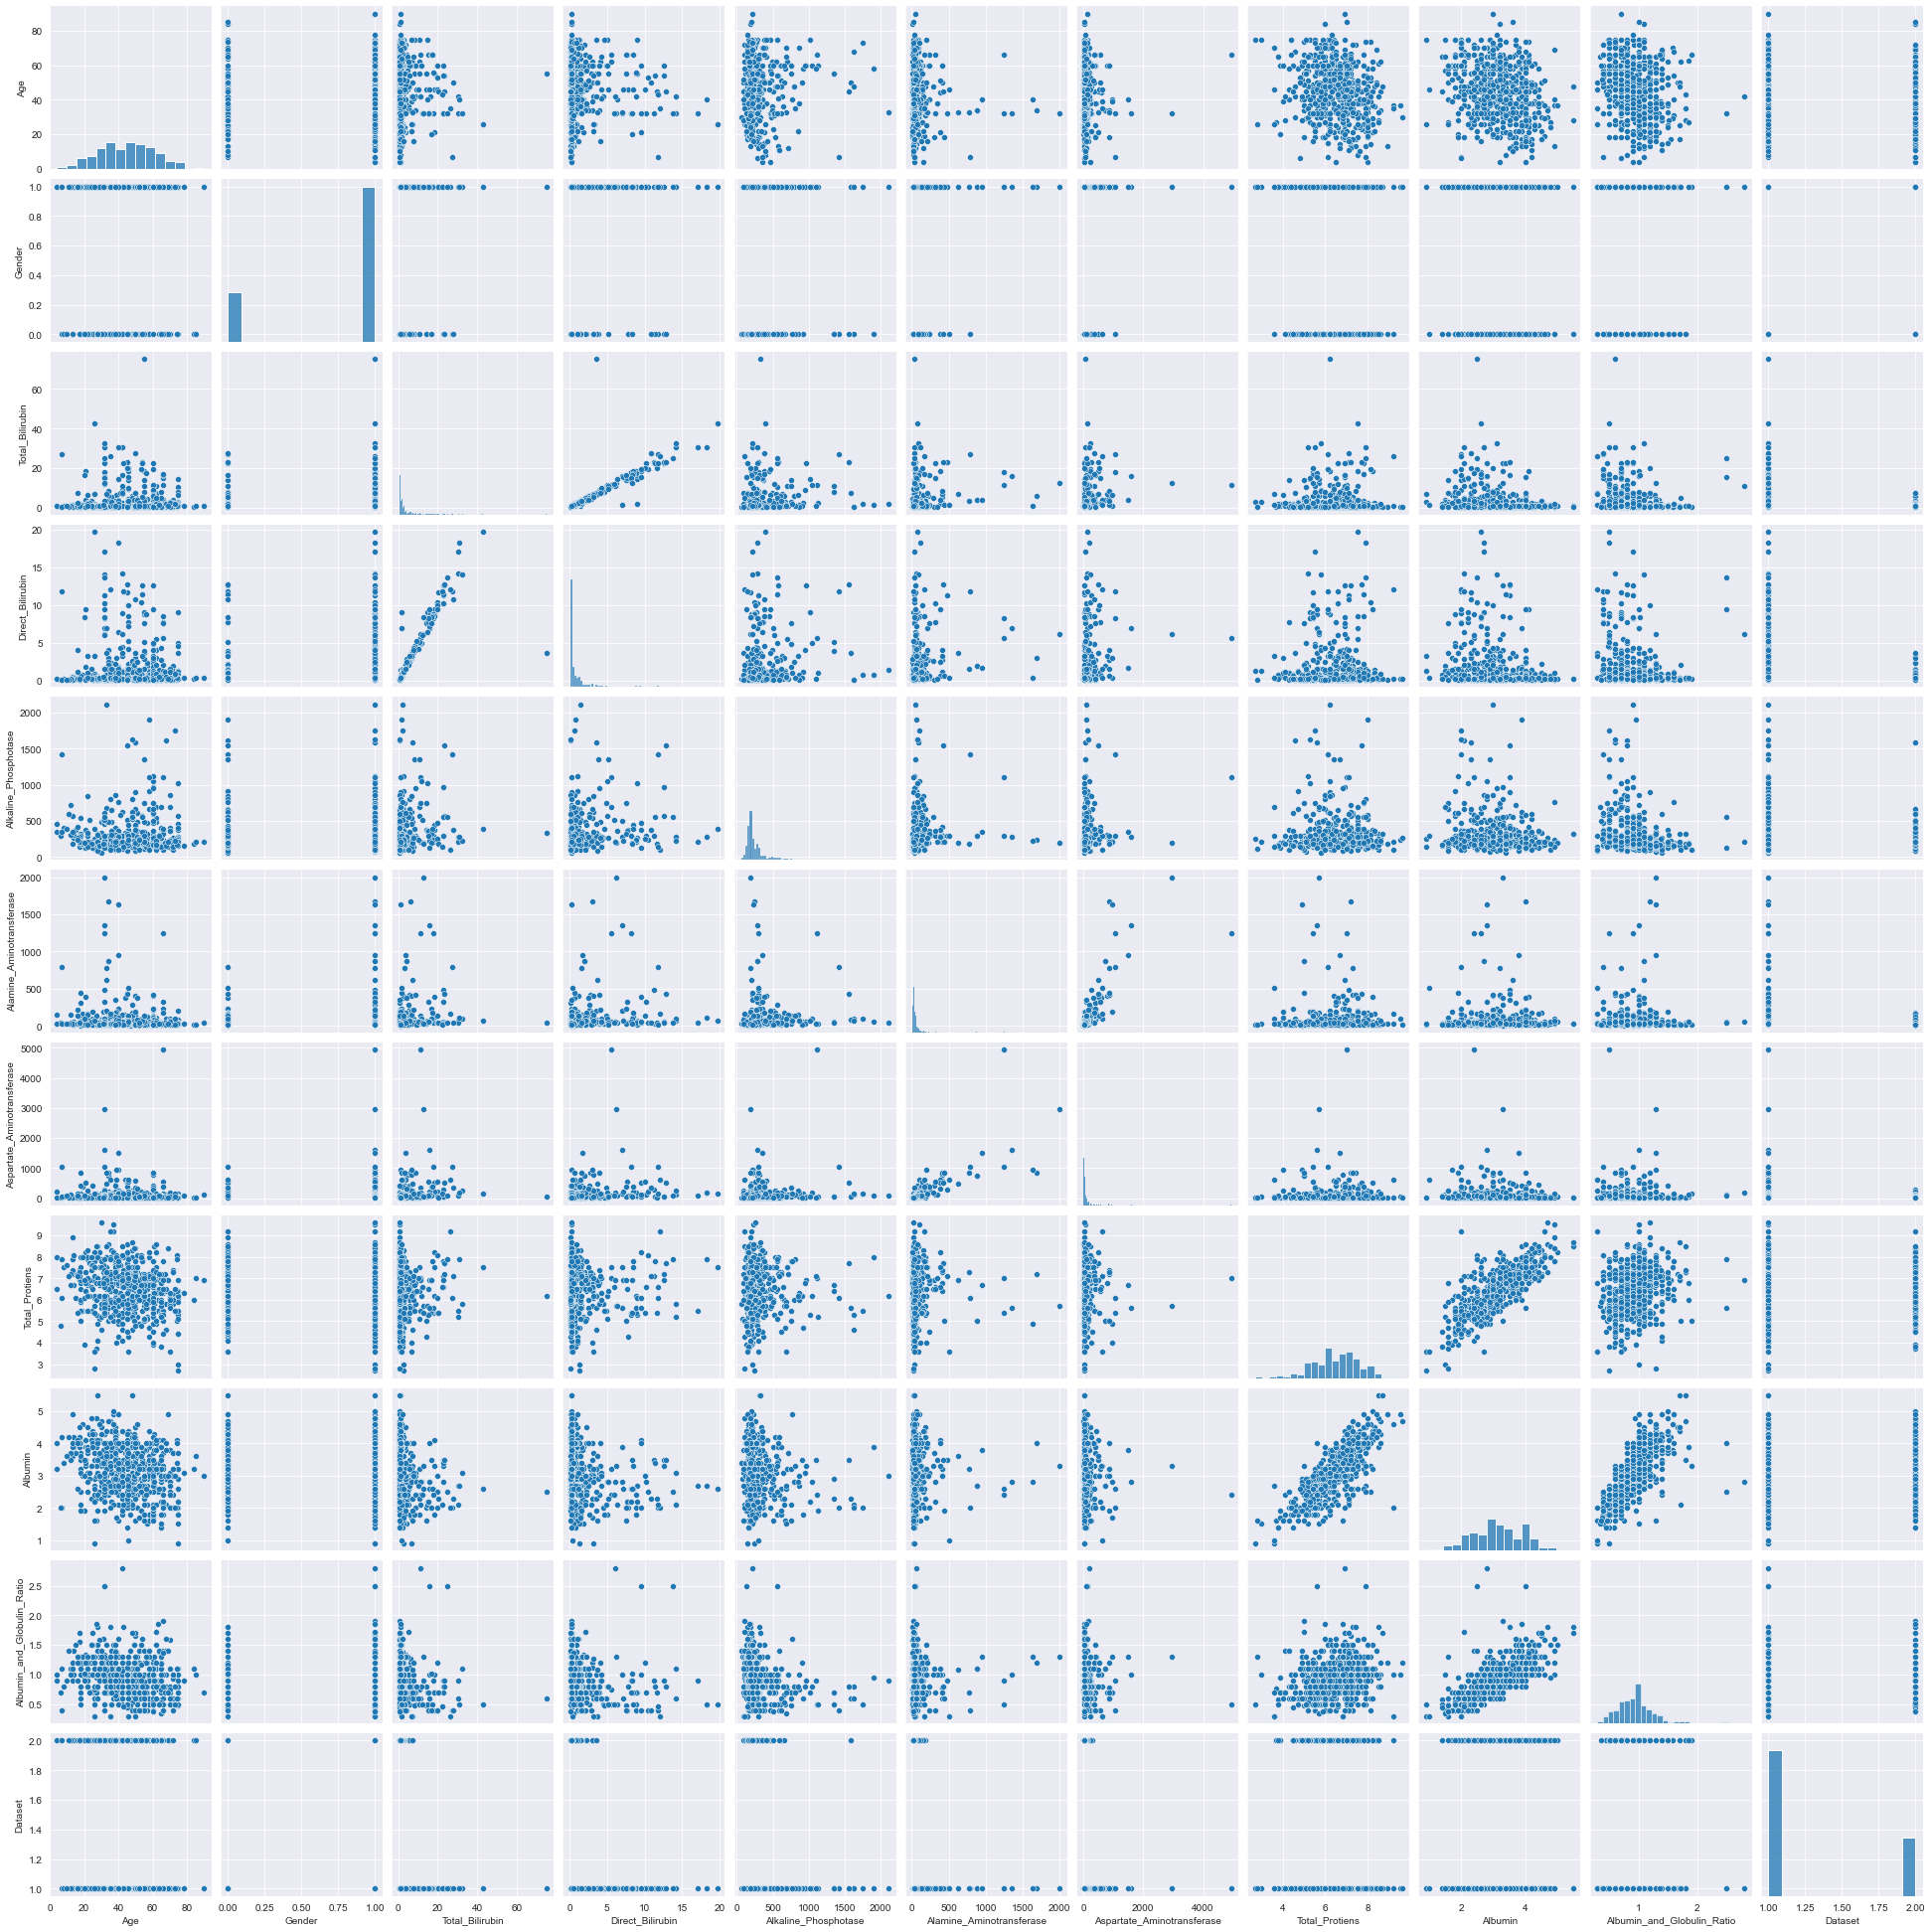

In [15]:
sns.pairplot(df)

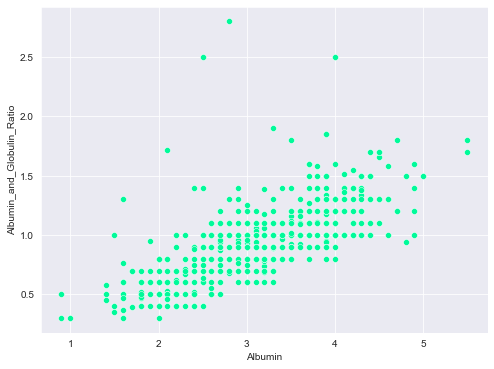

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x="Albumin", y="Albumin_and_Globulin_Ratio",color='mediumspringgreen',data=df);
plt.show()

<AxesSubplot:xlabel='Gender'>

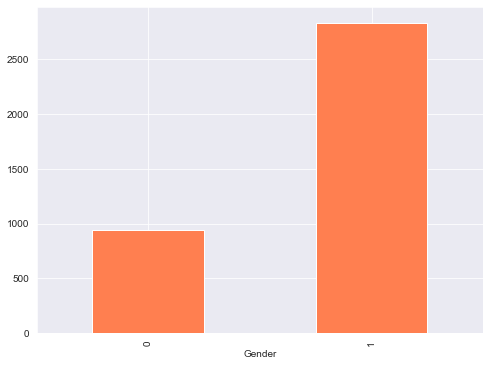

In [17]:
plt.figure(figsize=(8,6))
df.groupby('Gender').sum()["Total_Protiens"].plot.bar(color='coral')

<AxesSubplot:xlabel='Gender'>

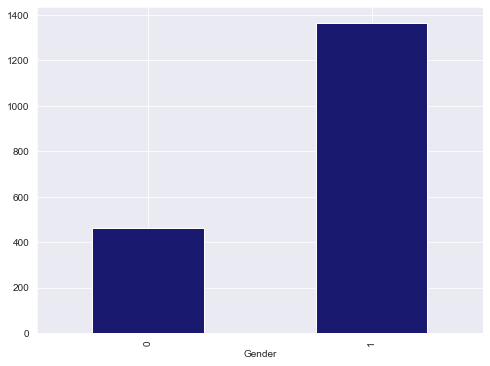

In [18]:
plt.figure(figsize=(8,6))
df.groupby('Gender').sum()['Albumin'].plot.bar(color='midnightblue')

<AxesSubplot:xlabel='Gender'>

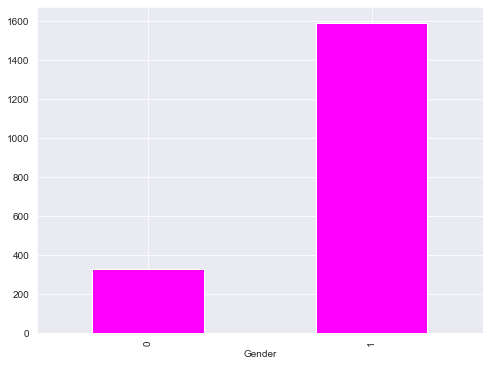

In [19]:
plt.figure(figsize=(8,6))
df.groupby('Gender').sum()['Total_Bilirubin'].plot.bar(color='fuchsia')

In [20]:
corr=df.corr()

<AxesSubplot:>

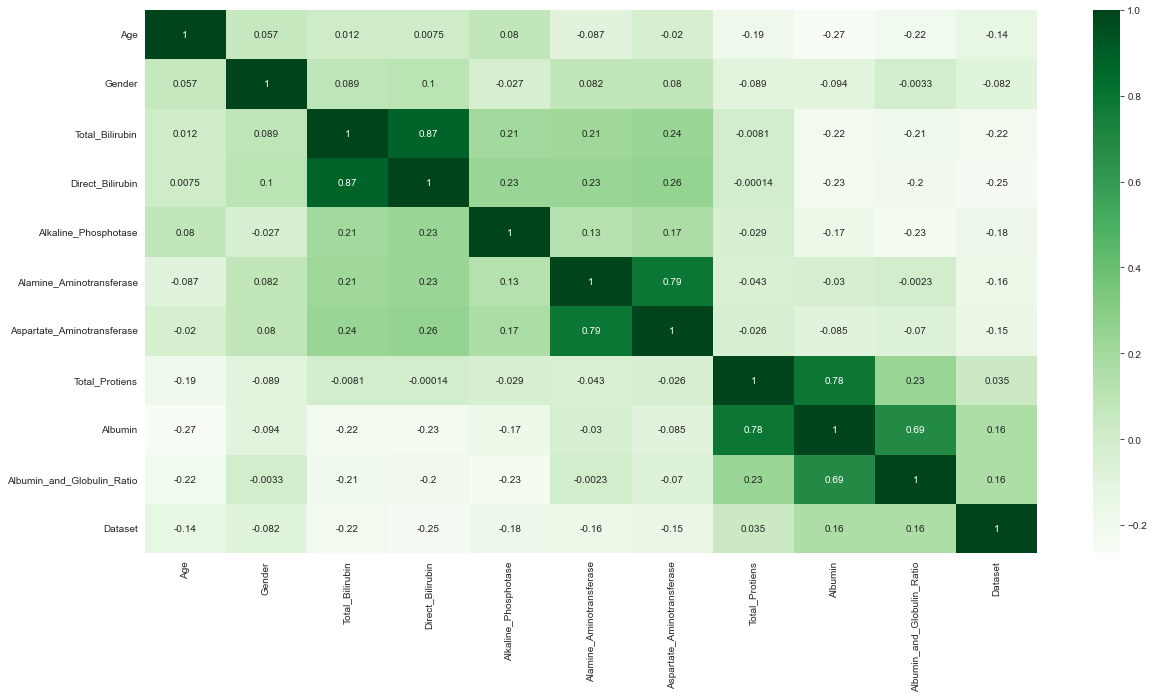

In [21]:
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Greens",annot=True)

## Train and Test the dataset

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [24]:
X=df[['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio']]
y=df['Dataset']

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)

In [26]:
X_train.shape

(408, 10)

In [27]:
y_train.shape

(408,)

In [28]:
X_test.shape

(175, 10)

In [29]:
y_test.shape

(175,)

## Choosing Best Algorithm for Model

## Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7485714285714286

## Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='lbfgs' , max_iter=1000)
logreg.fit(X_train, y_train)
y_pred= logreg.predict(X_test)
logreg.score(X_test, y_test)

0.7257142857142858

## SVM

In [32]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

0.7230972515856235

## KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
classifier=KNeighborsClassifier()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
acc=accuracy_score(y_test, y_pred)
print(acc)

0.6232876712328768


## Model

In [34]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [35]:
pwd

'C:\\Users\\SURIYA\\Documents\\Nalaiyathiran\\project\\Dataset'